In [41]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.lines import Line2D

current_directory = os.getcwd()
time = 5000
mtd_type = 'shuffle_diversity'
attack_operation_record = pd.read_csv(current_directory+ '\\data_analysis\\attack_operation_record_'+str(time)+'_'+mtd_type+'.csv')
mtd_operation_record = pd.read_csv(current_directory+'\\data_analysis\\mtd_operation_record_'+str(time)+'_'+mtd_type+'.csv')

In [42]:
mtd_operation_record.head()

,name,start_time,finish_time,duration,executed_at
0,osdiversity,0.000000,30.451108,30.451108,application
1,osdiversity,60.417503,90.593728,30.176225,application
2,IPShuffle,90.647882,141.001054,50.353171,network
3,PortShuffle,120.716126,155.944630,35.228505,application
4,PortShuffle,182.019316,217.215747,35.196431,application


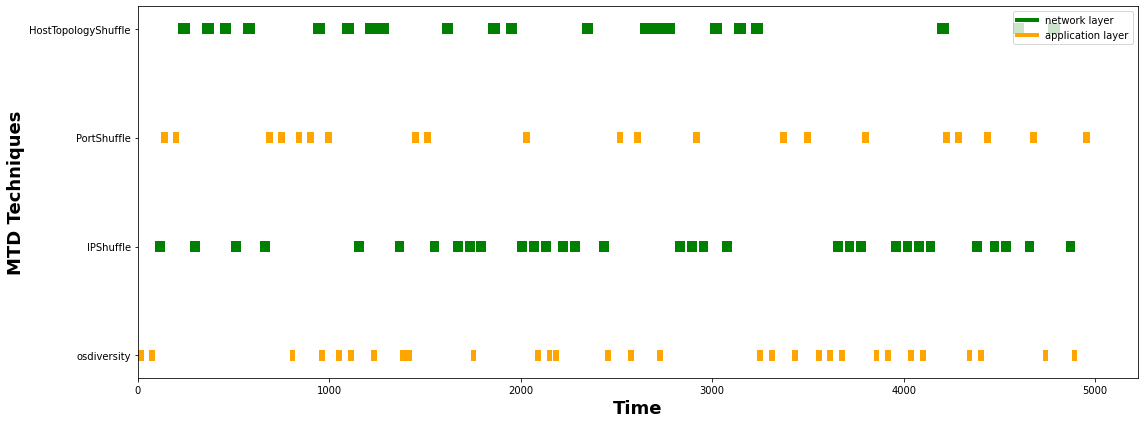

In [43]:
mtd_operation_record['color'] = np.where(mtd_operation_record['executed_at']=='network', 'green', 'orange')
fig, ax = plt.subplots(1, figsize=(16, 6))
ax.barh(mtd_operation_record['name'], mtd_operation_record['duration'], left=mtd_operation_record['start_time'], height=0.1, color=mtd_operation_record['color'])


custom_lines_mtd = [Line2D([0], [0], color='green', lw=4),
                    Line2D([0], [0], color='orange', lw=4)]
ax.legend(custom_lines_mtd, ['network layer', 'application layer'], loc='upper right')
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('MTD Techniques', weight='bold', fontsize=18)
fig.tight_layout()
plt.savefig('data_analysis/mtd_record.png')
plt.show()

In [44]:
attack_operation_record.head()

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
0,SCAN_HOST,0.000000,10.000000,10.000000,-1,0,0,0,None,[],None,None
1,ENUM_HOST,10.000000,25.000000,15.000000,-1,0,0,0,None,[],None,None
2,SCAN_PORT,25.000000,30.451108,5.451108,0,1,0,0,None,[],application,osdiversity
3,SCAN_PORT,32.451108,52.451108,20.000000,0,1,0,0,None,[],None,None
4,EXPLOIT_VULN,52.451108,77.822270,25.371162,0,1,0,0,0,"['Fay', 'Mercie', 'Rosella', 'Marge', 'Sephira']",None,None


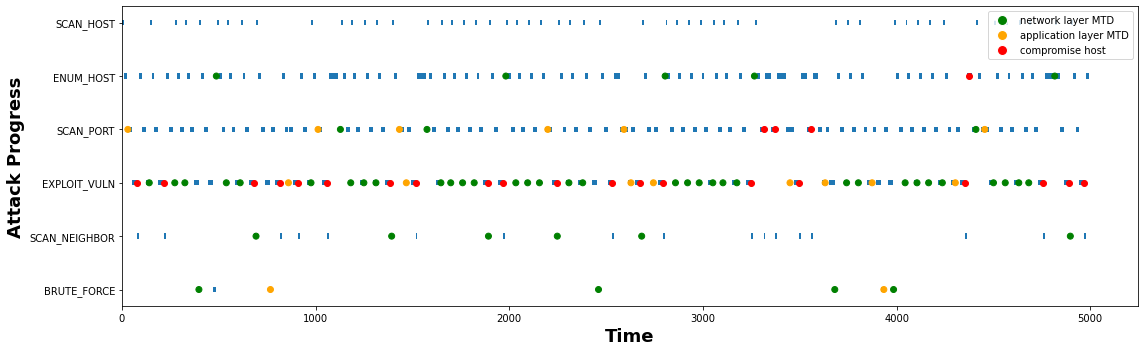

In [45]:
fig2, ax2 = plt.subplots(1, figsize=(16, 5))
ax2.barh(attack_operation_record['name'], attack_operation_record['duration'], left=attack_operation_record['start_time'], height=0.1, zorder=1)


interrupted_record = attack_operation_record[attack_operation_record['interrupted_in']!='None']
interrupted_record['color'] = np.where(interrupted_record['interrupted_in']=='network', 'green', 'orange')
ax2.scatter(interrupted_record['finish_time'], interrupted_record['name'], color=interrupted_record['color'], zorder=3)


compromise_record = attack_operation_record[attack_operation_record['compromise_host'] != 'None']
ax2.scatter(compromise_record['finish_time'], compromise_record['name'], color='red', zorder=2)


custom_lines_attack = [Line2D([0], [0], marker='o',color='w', markerfacecolor='green', markersize=10),
                       Line2D([0], [0], marker='o',color='w', markerfacecolor='orange', markersize=10),
                       Line2D([0], [0], marker='o',color='w', markerfacecolor='red', markersize=10),]

ax2.legend(custom_lines_attack, ['network layer MTD', 'application layer MTD', 'compromise host'], loc='upper right')

plt.gca().invert_yaxis()
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('Attack Progress', weight='bold', fontsize=18)
fig2.tight_layout()
plt.savefig('data_analysis/attack_record.png')
plt.show()

In [46]:
attack_operation_record[(attack_operation_record['name'] == 'SCAN_PORT') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
212,SCAN_PORT,3292.975044,3312.975044,20.0,22,6,255,15,22,"['Aili', 'Anselma', 'Trudi']",None,None
216,SCAN_PORT,3352.975044,3372.975044,20.0,23,1,255,16,23,"['Guinna', 'Sydel']",None,None
228,SCAN_PORT,3536.685095,3556.685095,20.0,31,1,280,18,31,"['Karol', 'Candis', 'Ezmeralda', 'Nancie']",None,None


In [47]:
attack_operation_record[(attack_operation_record['name'] == 'EXPLOIT_VULN') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
4,EXPLOIT_VULN,52.451108,77.822270,25.371162,0,1,0,0,0,"['Fay', 'Mercie', 'Rosella', 'Marge', 'Sephira']",None,None
12,EXPLOIT_VULN,188.001054,216.052724,28.051671,47,2,5,1,47,"['Elna', 'Ilene', 'Corenda', 'Valerye', 'Sharl...",None,None
43,EXPLOIT_VULN,657.625480,683.170044,25.544564,47,6,58,2,47,"['Ceil', 'Kelsey', 'Deva', 'Caryl', 'Mina']",None,None
51,EXPLOIT_VULN,788.847544,814.722439,25.874896,38,1,75,3,38,"['Ailina', 'Francesca', 'Ronalda', 'Rosaleen']",None,None
57,EXPLOIT_VULN,881.780068,908.039378,26.259310,52,1,80,4,52,"['Karyn', 'Blythe', 'Darla', 'Cookie']",None,None
66,EXPLOIT_VULN,1034.638528,1060.068887,25.430359,52,2,88,5,52,"['Xylia', 'Annemarie', 'Daloris', 'Gleda', 'Li...",None,None
87,EXPLOIT_VULN,1358.591653,1385.524178,26.932525,50,3,129,6,50,"['Silva', 'Windy', 'Lynna']",None,None
95,EXPLOIT_VULN,1490.478794,1515.949872,25.471077,47,8,165,7,47,"['Jonie', 'Renae', 'Shoshanna', 'Rozalin', 'Co...",None,None
120,EXPLOIT_VULN,1865.997884,1891.269576,25.271692,50,4,204,8,50,"['Annmarie', 'Mildred', 'Margie', 'Blakeley', ...",None,None
125,EXPLOIT_VULN,1939.546590,1965.796215,26.249625,33,2,206,9,33,"['Tammie', 'Hollie', 'Lelah', 'Sindee']",None,None


In [48]:
attack_operation_record[(attack_operation_record['name'] == 'BRUTE_FORCE') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
